# Introduction to clustering

Cluster analysis or clustering is part of the larger field of machine learning and is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).  

It is a main task of exploratory data analysis, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.  

Clustering itself is not one specific algorithm, but the general task to be solved. It can be achieved by various algorithms that differ significantly in their understanding of what constitutes a cluster and how to efficiently find them

Popular notions of clusters include:
* Groups with small distances between cluster members
* Dense areas of the data space, intervals or particular statistical distributions.

**Clustering can therefore be formulated as a multi-objective optimization problem**

## Datasets

In [1]:
import pandas as pd
import plotly_express as px
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

In [2]:
features, true_labels = make_blobs(n_samples=50, centers=4, cluster_std=1.5, random_state=42)
blobs_df = pd.DataFrame([[x, y, l] for (x,y),l in zip(features, true_labels)], columns=['x','y','label'])
blobs_df.label = blobs_df.label.astype(str)

### Plotting the data without the lables

Can you spot the clusters?

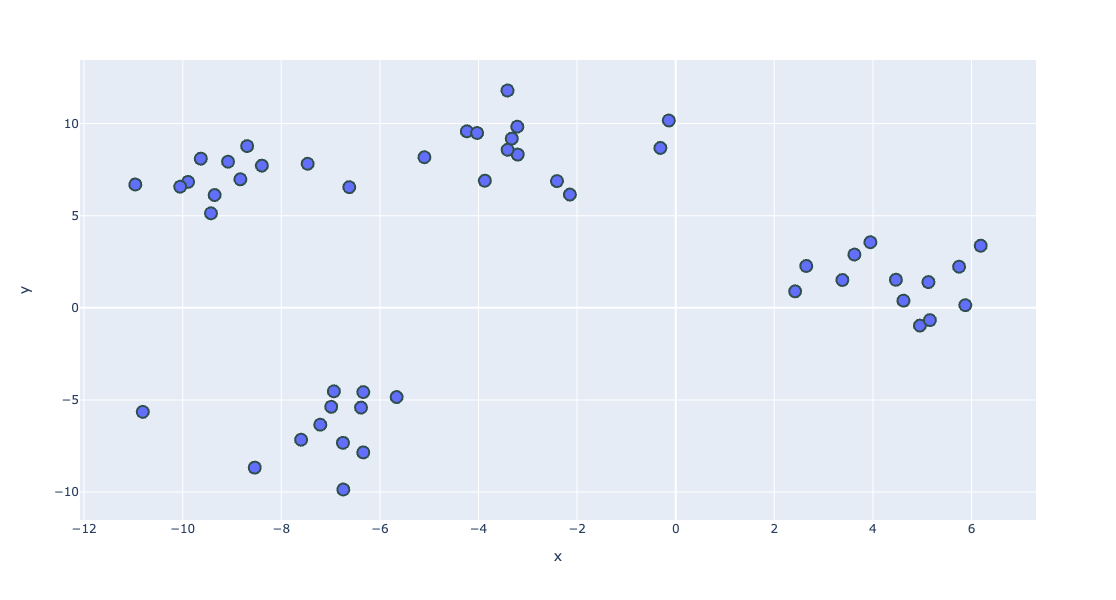

In [169]:
fig = px.scatter(blobs_df, x='x', y='y', height=600)
fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

### Plotting the data with the lables

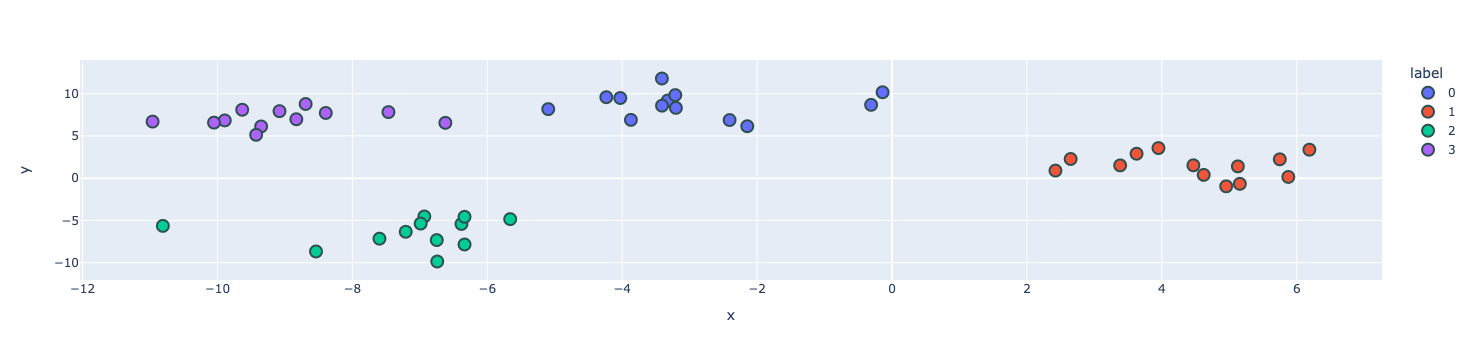

In [4]:
fig = px.scatter(blobs_df, x='x', y='y', color='label')
fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

## Types of clustering algorithms

You can perform clustering using many different approaches—so many, in fact, that there are entire categories of clustering algorithms. Each of these categories has its own unique strengths and weaknesses. This means that certain clustering algorithms will result in more natural cluster assignments depending on the input data.



* Connectivity-based clustering (hierarchical clustering)
* Centroid-based clustering
* Distribution-based clustering
* Density-based clustering

## Centroid based algorithms

In [5]:
from IPython.display import YouTubeVideo

### K-Means algorithm

K-means clustering is an iterative clustering technique which assumes there are K distinct clusters in the data. The algorithm start with random K cluster centers, dentoted as **centroids**, and in each iteration, preforms two tasks:
1. Assign each data point to its nearest centroid (the expectation step)
2. Computes the mean of all the points for each cluster and sets the new centroid (the Maximization step)

The process is then repeated until the K cluster centroids do not change. 

![](https://files.realpython.com/media/kmeans-algorithm.a94498a7ecd2.png)

#### Measuring the K-means performance

The quality of the cluster assignments is determined by computing the  total variation within clusters by computing sum of the squared error (SSE) after the centroids converge. The SSE is defined as the sum of the squared Euclidean distances of each point to its assigned centroid:

* Comupute the square distance of each point to **it assigned cluster centroid**
* Sum all squared distances

Since this is a measure of error, the objective of k-means is to try to minimize this value.

#### k-means sklearn implementation

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans = KMeans(1, n_init=10)
identified_clusters = kmeans.fit_predict(blobs_df[['x','y']])
blobs_df['cluster_id'] = identified_clusters
blobs_df.cluster_id = blobs_df.cluster_id.astype(str)

In [8]:
kmeans.cluster_centers_

array([[-3.50673413,  2.79604659]])

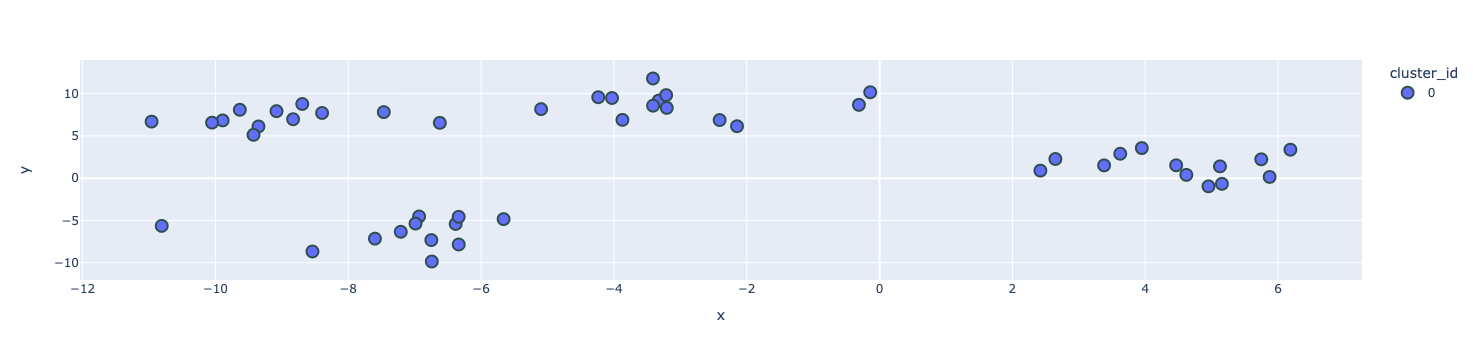

In [9]:
fig = px.scatter(blobs_df, x='x', y='y', color='cluster_id')
fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

In [10]:
kmeans = KMeans(2, n_init=10)
identified_clusters = kmeans.fit_predict(blobs_df[['x','y']])
blobs_df['cluster_id'] = identified_clusters
blobs_df.cluster_id = blobs_df.cluster_id.astype(str)

In [11]:
kmeans.cluster_centers_

array([[-5.88811288,  7.95518241],
       [-1.12535537, -2.36308922]])

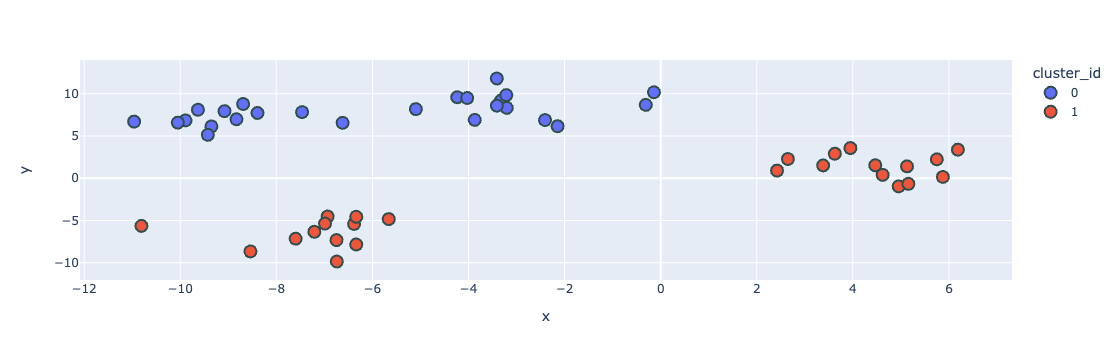

In [12]:
fig = px.scatter(blobs_df, x='x', y='y', color='cluster_id')
fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

<div class="alert alert-block alert-warning">
<b>Question: Compute the resulted total variation within each cluster</b>
</div>

In [13]:
kmeans = KMeans(3,  n_init=10)
identified_clusters = kmeans.fit_predict(blobs_df[['x','y']])
blobs_df['cluster_id'] = identified_clusters
blobs_df.cluster_id = blobs_df.cluster_id.astype(str)

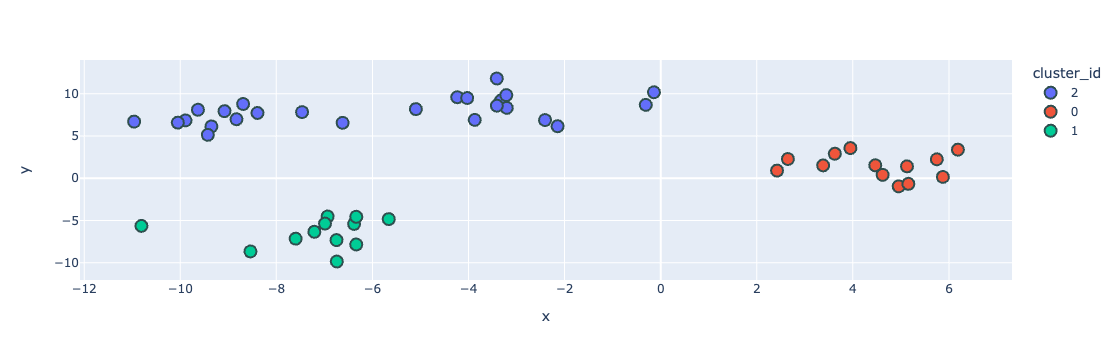

In [14]:
fig = px.scatter(blobs_df, x='x', y='y', color='cluster_id')
fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

In [15]:
kmeans.inertia_

418.95852132675304

In [16]:
blobs_df.groupby('cluster_id')[['x','y']].std().sum().sum()

10.584528229568187

<div class="alert alert-block alert-warning">
<b>Question: Compute the resulted total variation within each cluster. Is it bigger/smaller from the total variation for when K=2?</b>
</div>

#### K-Means - the search for a proper K

The above algorithm assums the correct number of clusters in knwon in advance. This is usually not the case. Note that if the number of clusters equals the number of points, the total varation would reach an absolut minimum of 0, becasue each datapoint will be its own cluster. This is a general rule - The total variation will decrease as K increase, which means we can't select K by the value the brings the total variation to the minimum.

What we can do, though, is look at the decrease of the variation as we move from k=1 to k=n, and select the k that decrease the varation the most:

In [17]:
kmeans.inertia_

418.95852132675304

In [18]:
variation = []
for k in range(1, 10):
    kmeans = KMeans(k)
    identified_clusters = kmeans.fit_predict(blobs_df[['x','y']])
    variation.append((k, kmeans.inertia_))                                                                                                  
variation_df = pd.DataFrame(variation, columns=['k','total_variation'])    
variation_df['variation_diff'] = variation_df.total_variation.diff().abs()

In [19]:
variation_df['variation_diff'].diff()

0           NaN
1           NaN
2   -376.772641
3   -992.420355
4   -220.213453
5     -5.070713
6     -2.652234
7      1.661855
8     -4.134815
Name: variation_diff, dtype: float64

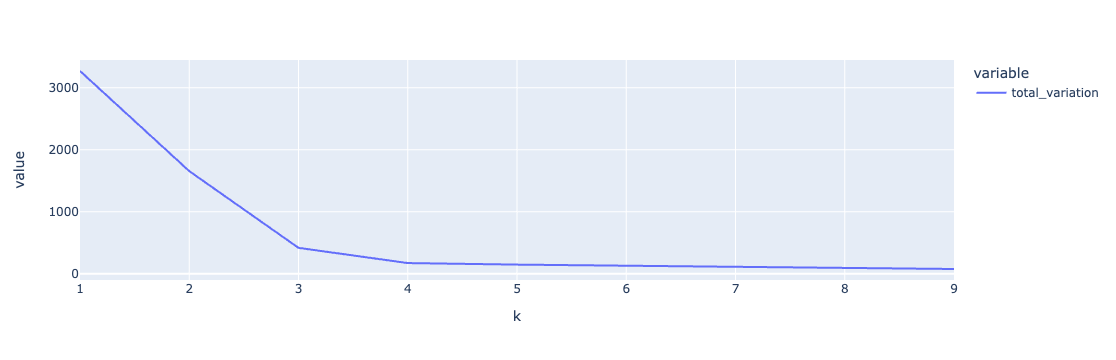

In [20]:
px.line(variation_df, x='k',y=['total_variation'])

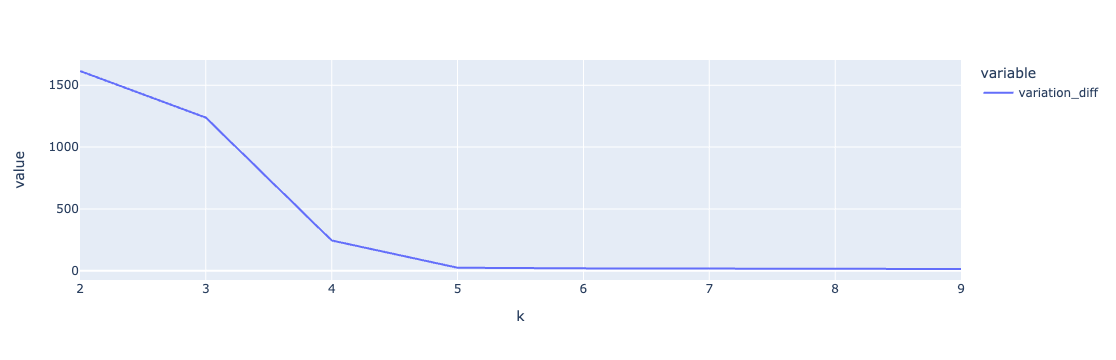

In [21]:
px.line(variation_df[1:], x='k',y=['variation_diff'])

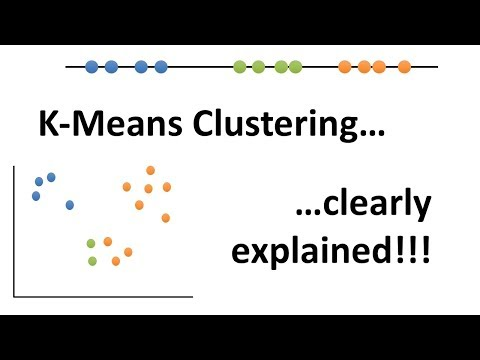

In [22]:
YouTubeVideo('4b5d3muPQmA', width=800, height=300)

#### K-mean self-implementation

<div class="alert alert-block alert-warning">
<b>Implement KMeans algorithm by yourself</b>
</div>

In [23]:
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

class MyKMeans():
    def __init__(self, k, n_init=10):
        self.k = k
        self.n_init = n_init
    
    def run_expectation_maximization(self, df : pd.DataFrame, save_process=False):
        
        curr_centroids = df.sample(self.k).values
        last_iter_centroids = np.zeros(curr_centroids.shape)
        iter_counter = 0
        
        df = df.copy()
        allocation_state_df = pd.DataFrame()
        data_cols = df.columns
                
        while (curr_centroids != last_iter_centroids).sum() > 0:                
            df['cluster_id'] = euclidean_distances(df[data_cols].values, curr_centroids).argmin(axis=1)
            df.cluster_id = df.cluster_id.astype(str)

            if save_process:
                df['iteration'] = iter_counter
                centroid_marker_size, data_marker_size = 4, 1
                df['marker_size']= df.apply(lambda row: centroid_marker_size if row[data_cols].values in curr_centroids else data_marker_size, axis=1)
                centroids_df = pd.DataFrame(curr_centroids, columns=data_cols).assign(iteration=iter_counter).assign(cluster_id=lambda x: x.index.astype(str)).assign(marker_size=centroid_marker_size)
                allocation_state_df = allocation_state_df.append(df.copy()).append(centroids_df)
            
            last_iter_centroids = curr_centroids
            curr_centroids = df.groupby('cluster_id')[data_cols].mean().values
            iter_counter += 1
        
        return df, allocation_state_df
    
    def fit_predict(self, df : pd.DataFrame, save_process=False):
        data_cols = list(df.columns)
        minimal_sse = self.calc_sse(df)
        f_clustered, f_process = None, None
        for i in range(self.n_init):
            clustered, process = self.run_expectation_maximization(df, save_process=save_process)
            data = clustered[data_cols + ['cluster_id']] 
            sse = data.groupby('cluster_id').apply(self.calc_sse).sum()
            if sse < minimal_sse:
                minimal_sse = sse
                f_clustered, f_process = clustered, process
        return f_clustered if not save_process else f_process
            
    def calc_sse(self, grp):
        center = grp.mean()        
        return ((grp - center)**2).sum().sum()
        
            

In [24]:
kmeans = MyKMeans(4)
clustered = kmeans.fit_predict(blobs_df[['x','y']])

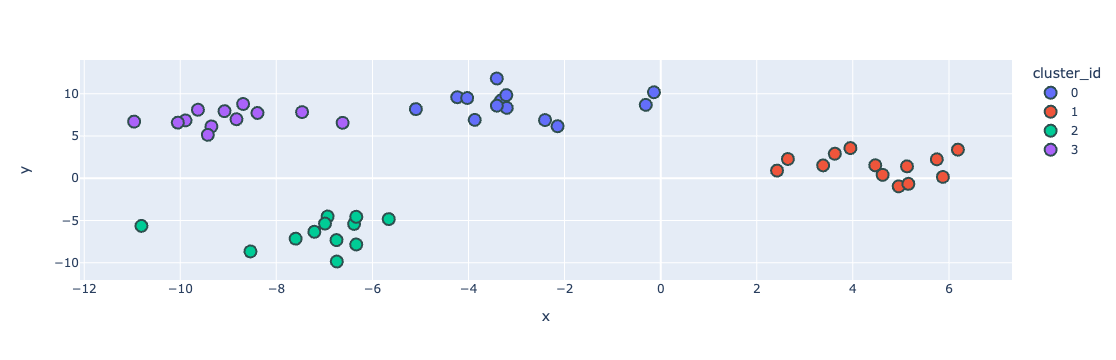

In [25]:
fig = px.scatter(clustered, x='x', y='y', color='cluster_id')
fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

Let's use the "save_process" flag to animate the process:

In [202]:
%%capture
kmeans = MyKMeans(4, n_init=1)
clustered = kmeans.fit_predict(blobs_df[['x','y']], save_process=True)

In [203]:
clustered.head()

,x,y,cluster_id,iteration,marker_size
0,-3.411758,11.792703,1,0,1
1,4.953174,-0.966336,3,0,1
2,2.422096,0.893403,3,0,1
3,-10.809245,-5.647256,0,0,4
4,-3.871234,6.895831,1,0,1


In [204]:
blobs_df[['x','y']].max()

x     6.186378
y    11.792703
dtype: float64

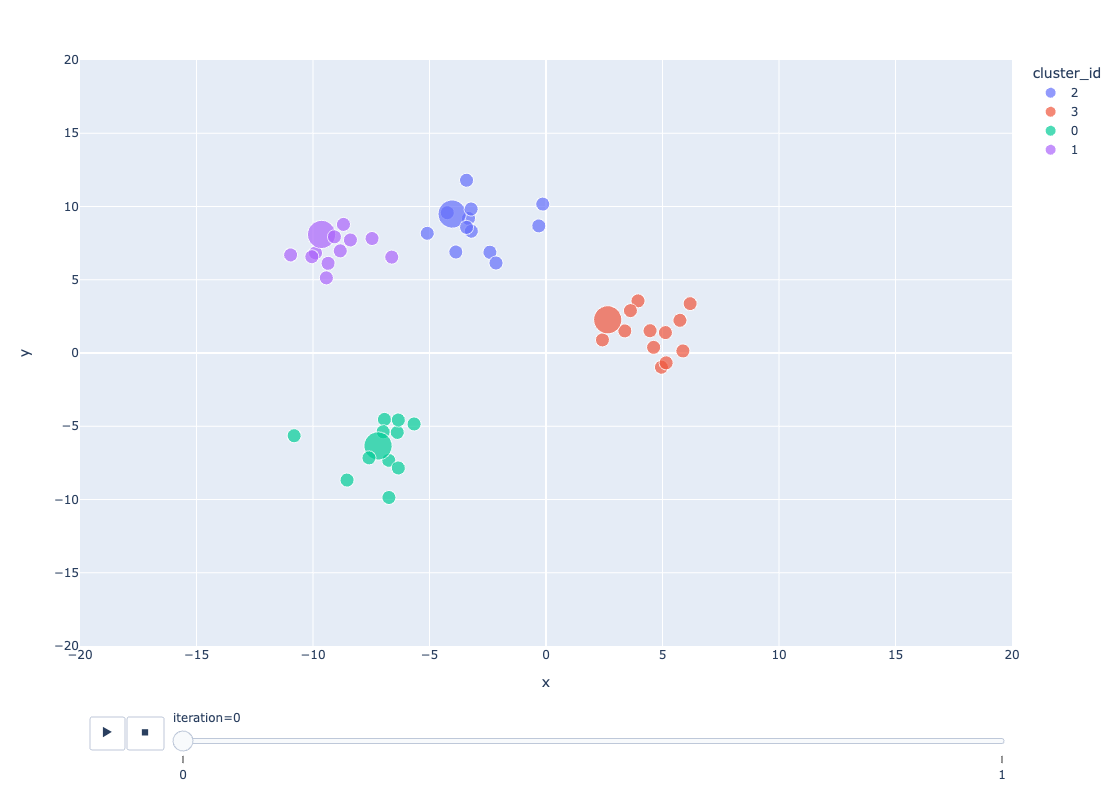

In [29]:
px.scatter(clustered, x="x", y="y", animation_frame="iteration", animation_group='y',  color="cluster_id", size='marker_size', 
                range_x=[-20,20], range_y=[-20,20], height=800)

### A more difficult 2D example

In [30]:
features, true_labels = make_blobs(n_samples=200, centers=6, cluster_std=2, random_state=42)
more_blobs_df = pd.DataFrame([[x, y, l] for (x,y),l in zip(features, true_labels)], columns=['x','y','label'])
more_blobs_df.label = more_blobs_df.label.astype(str)

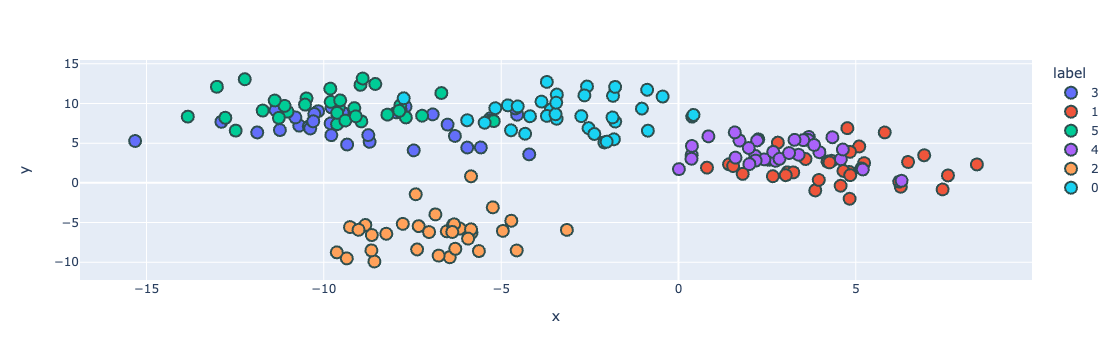

In [31]:
fig = px.scatter(more_blobs_df, x='x', y='y', color='label')
fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

**Now, let's cluster!**

In [41]:
%%capture
kmeans = MyKMeans(6, n_init=10)
data = more_blobs_df[['x','y']].copy()
clustered = kmeans.fit_predict(data, save_process=True)

In [42]:
clustered.head()

,x,y,cluster_id,iteration,marker_size
0,-11.238921,6.654520,1,0,1
1,4.813973,1.375155,5,0,1
2,-12.484479,6.583269,1,0,1
3,3.673133,5.788471,0,0,1
4,-5.835744,-6.286140,5,0,1


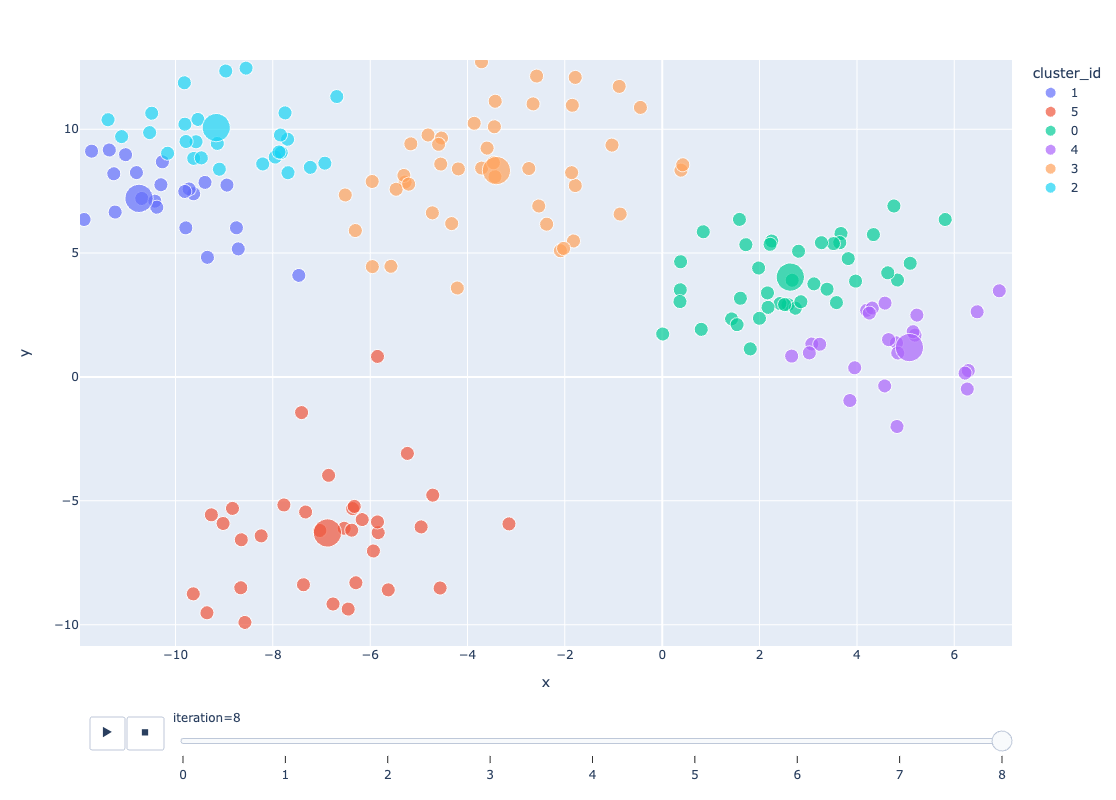

In [43]:
px.scatter(clustered, x="x", y="y", animation_frame="iteration", animation_group='y',  color="cluster_id", size='marker_size', 
                range_x=[blobs_df.x.min() - 1,blobs_df.x.max() + 1], range_y=[blobs_df.y.min() - 1,blobs_df.y.max() + 1], height=800)

## Connectivity-based clustering (Hierarchical clustering)

### Theory of Hierarchical Clustering

There are two types of hierarchical clustering: 
* Agglomerative  - data points are clustered using a bottom-up approach starting with individual data points
* Divisive - top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters

We will focus on agglomerative clustering that involves the bottom-up approach.

### Hierarchical Clustering - Algorithm


Following are the steps involved in agglomerative clustering:

1. At the start, treat each data point as one cluster. Therefore, the number of clusters at the start will be the number of data points.
2. Form a cluster by joining the two closest data points resulting in K-1 clusters.
3. Form more clusters by joining the two closest clusters resulting in K-2 clusters.
4. Repeat the above three steps until one big cluster is formed.
5. Once single cluster is formed, dendrograms are used to divide into multiple clusters depending upon the problem. We will study the concept of dendrogram in detail in an upcoming section.

There are different ways to find distance between the clusters. The distance itself can be Euclidean or Manhattan distance. Following are some of the options to measure distance between two clusters:

* Measure the distance between the closes points of two clusters (AKA single).
* Measure the distance between the farthest points of two clusters (AKA complete).
* Measure the distance between the centroids of two clusters (AKA centroid).
* Measure the distance between all possible combination of points between the two clusters and take the mean (AKA average).

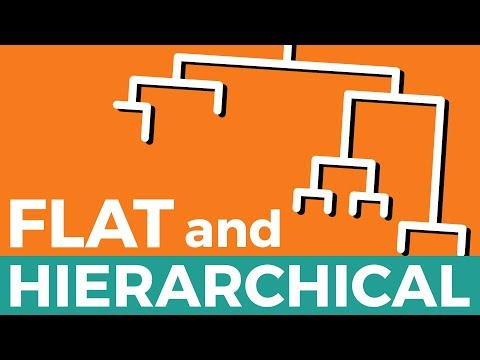

In [35]:
YouTubeVideo('ijUMKMC4f9I', width=800, height=300)

### Toy example

In [170]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [171]:
X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]

In [46]:
for i,x in enumerate(X):
    print(i,x)

0 [2]
1 [8]
2 [0]
3 [4]
4 [1]
5 [9]
6 [9]
7 [0]


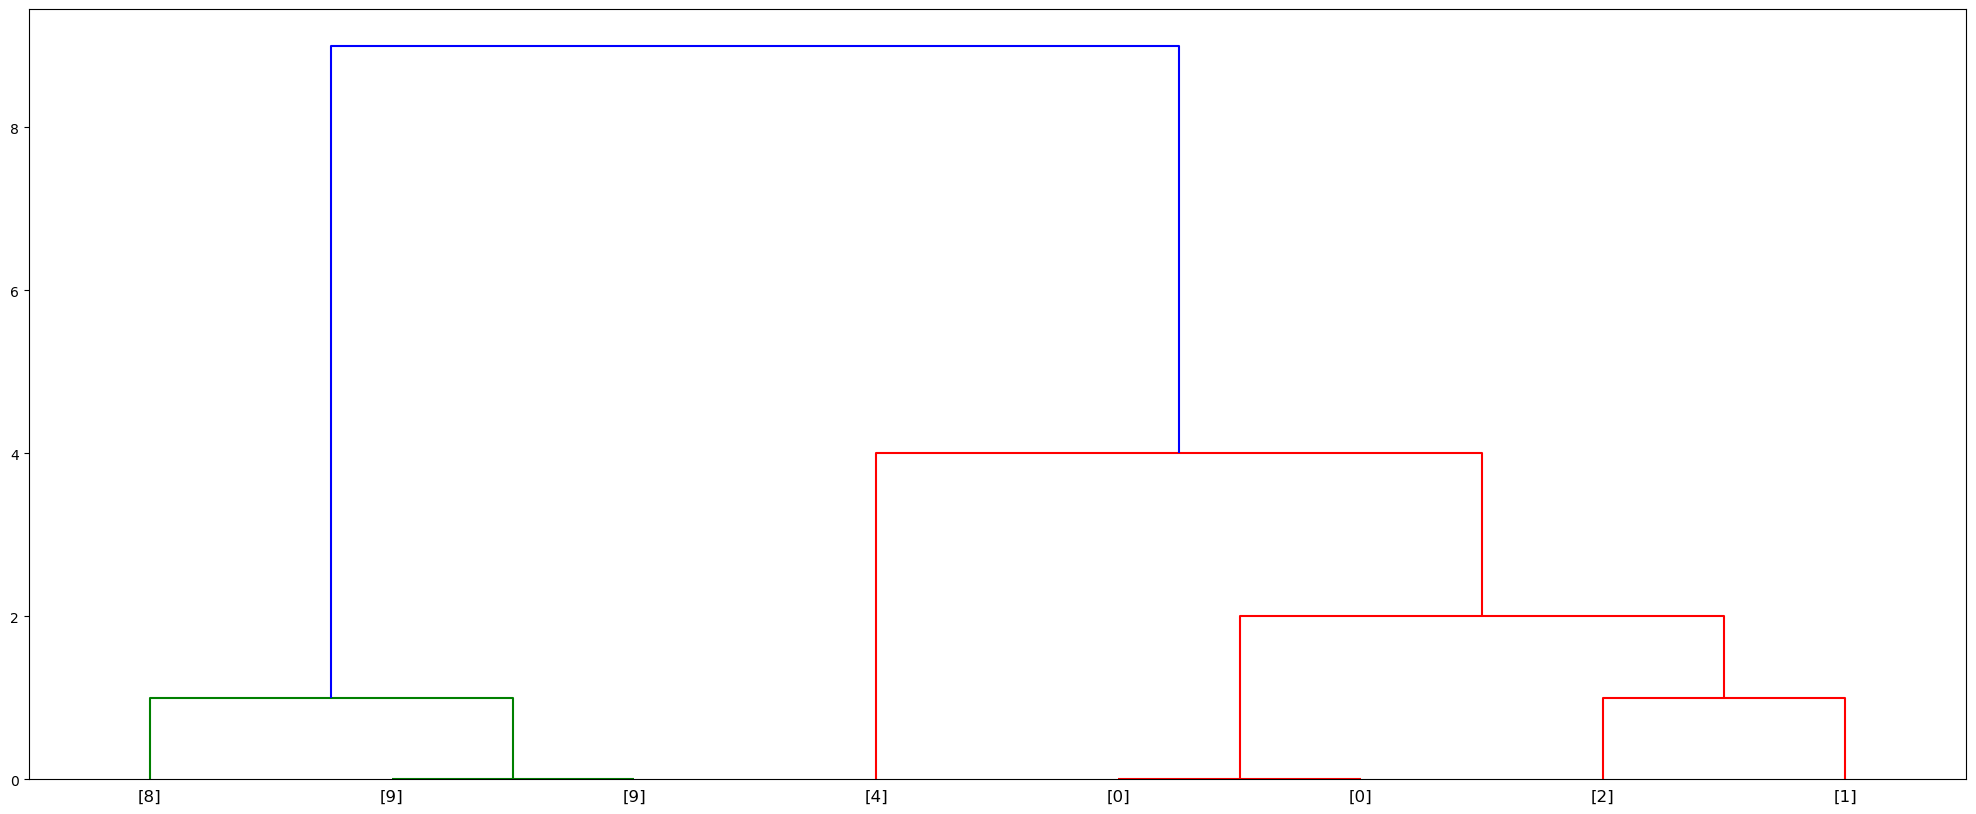

In [173]:
Z = linkage(X, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, labels=X)
plt.show()

### On our data

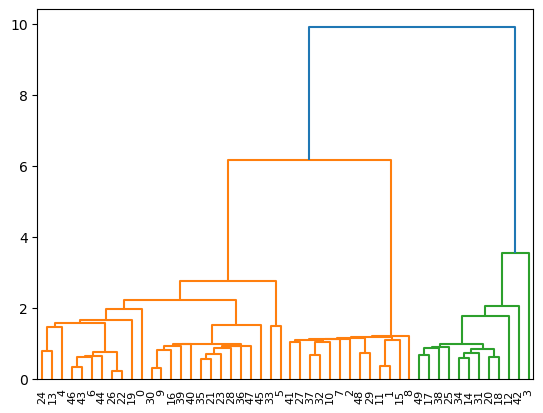

In [49]:
linked = linkage(blobs_df[['x','y']], 'single')
dn = dendrogram(linked, orientation='top', labels=blobs_df.index, distance_sort='descending', show_leaf_counts=True)
plt.show()

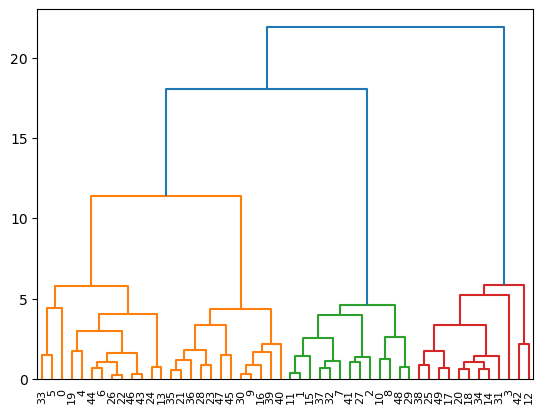

In [50]:
linked = linkage(blobs_df[['x','y']], 'complete')
dn = dendrogram(linked, orientation='top', labels=blobs_df.index, distance_sort='descending', show_leaf_counts=True)
plt.show()

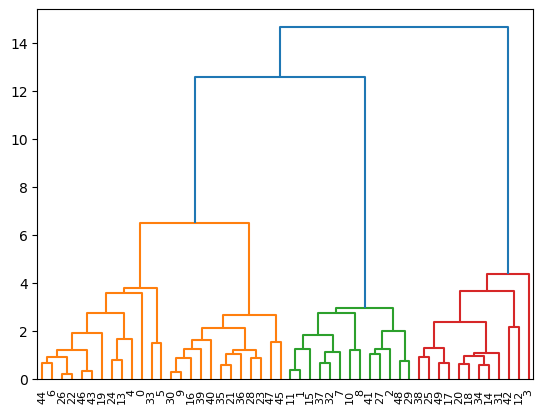

In [51]:
linked = linkage(blobs_df[['x','y']], 'average')
d_matrix = dendrogram(linked, orientation='top', labels=blobs_df.index, distance_sort='descending', show_leaf_counts=True)
plt.show()

In [52]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
cluster.fit_predict(blobs_df[['x','y']])

array([1, 2, 2, 0, 1, 1, 1, 2, 2, 3, 2, 2, 0, 1, 0, 2, 3, 0, 0, 1, 0, 3,
       1, 3, 1, 0, 1, 2, 3, 2, 3, 0, 2, 1, 0, 3, 3, 2, 0, 3, 3, 2, 0, 1,
       1, 3, 1, 3, 2, 0])

### Searching for optimal K:

In [183]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
blobs_df['cluster'] = cluster.fit_predict(blobs_df[['x','y']]).astype(str)

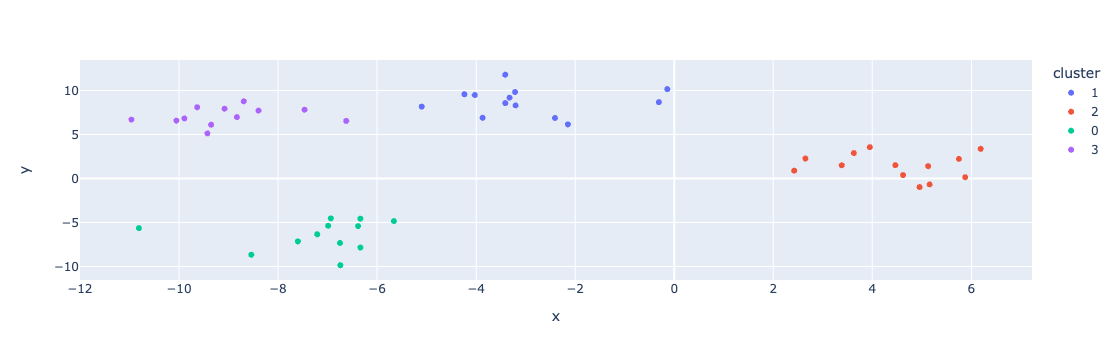

In [184]:
px.scatter(blobs_df, x='x', y='y', color='cluster')

In [198]:
def apply_calculate_sse(g):
    data_cols = ['x','y']
    cluster_means = g[data_cols].mean()
    centered_data = g[data_cols] - cluster_means
    return (centered_data ** 2).sum().sum()    

In [199]:
apply_calculate_sse(blobs_df[blobs_df.cluster == "0"])

52.492667468449255

In [201]:
results = []
for k in range(1, 7):
    for l in ['single','average','complete']:
        cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage=l)
        blobs_df['cluster'] = cluster.fit_predict(blobs_df[['x','y']])    
        sse = blobs_df.groupby('cluster').apply(apply_calculate_sse).sum()
        results.append((k, l, sse))

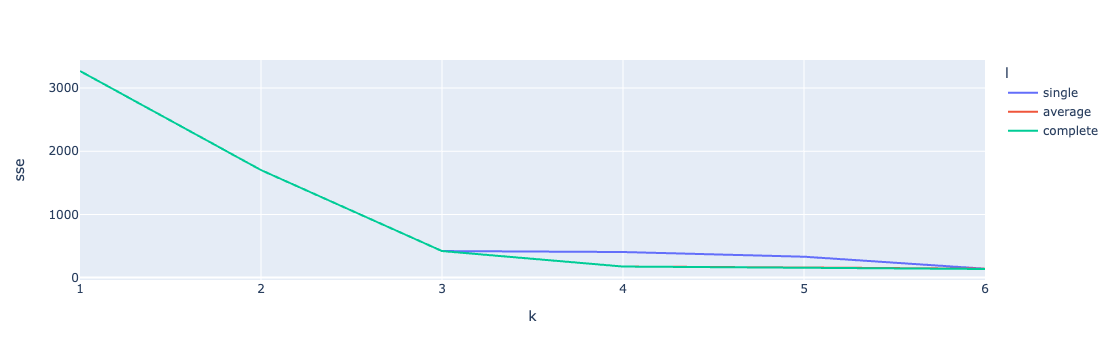

In [203]:
px.line(results, x='k', y='sse', color='l')

### Single vs Complete linkage

Our control over how to define the distance between clusters allows us to decide whether we prefer creating condence clusters (by using the complete linkage) or lengthy, spreaded clusters (by using the single linkage) 

In [213]:
import numpy as np

In [216]:
from sklearn.datasets import make_circles
data, y = make_circles(n_samples=200, noise=0.12, factor=0.5)
df = pd.DataFrame(data, columns=['x','y'])

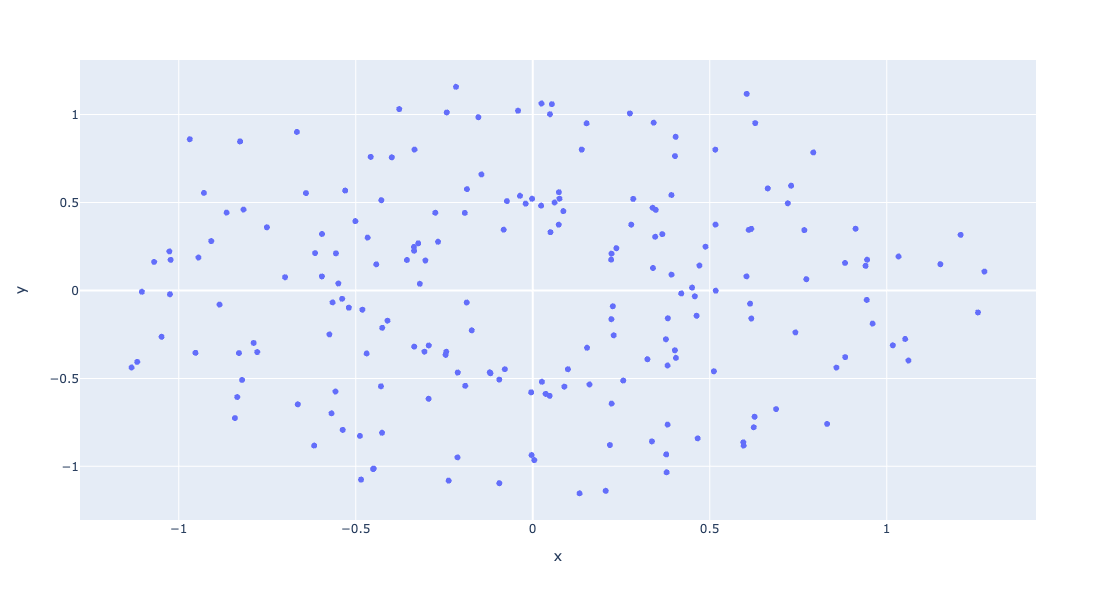

In [217]:
px.scatter(df, x='x', y='y', height=600)

In [218]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
df['cluster'] = cluster.fit_predict(df[['x','y']]).astype(str)

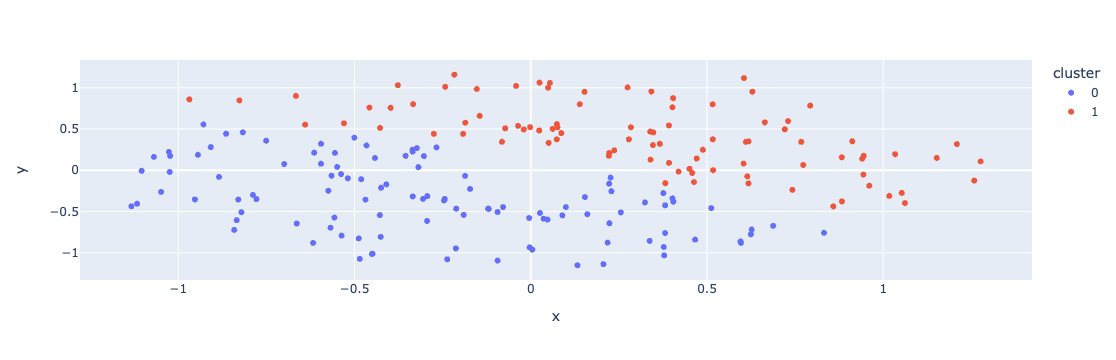

In [219]:
px.scatter(df, x='x', y='y', color='cluster')

In [220]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
df['cluster'] = cluster.fit_predict(df[['x','y']]).astype(str)

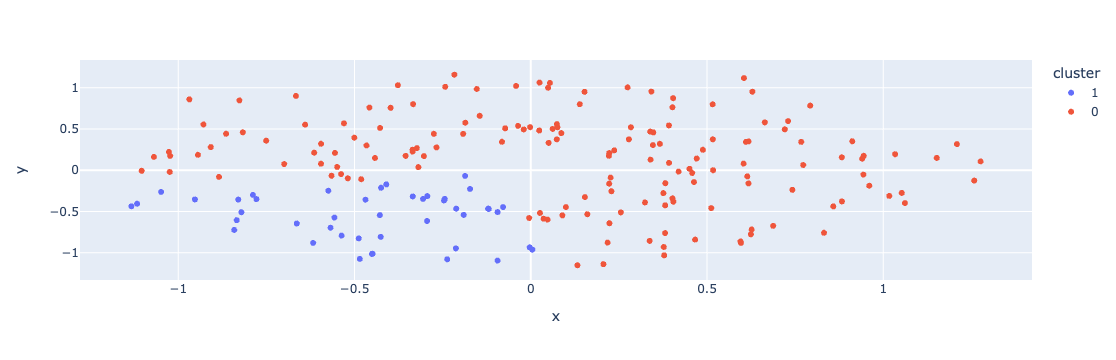

In [221]:
px.scatter(df, x='x', y='y', color='cluster')

In [222]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
df['cluster'] = cluster.fit_predict(df[['x','y']]).astype(str)

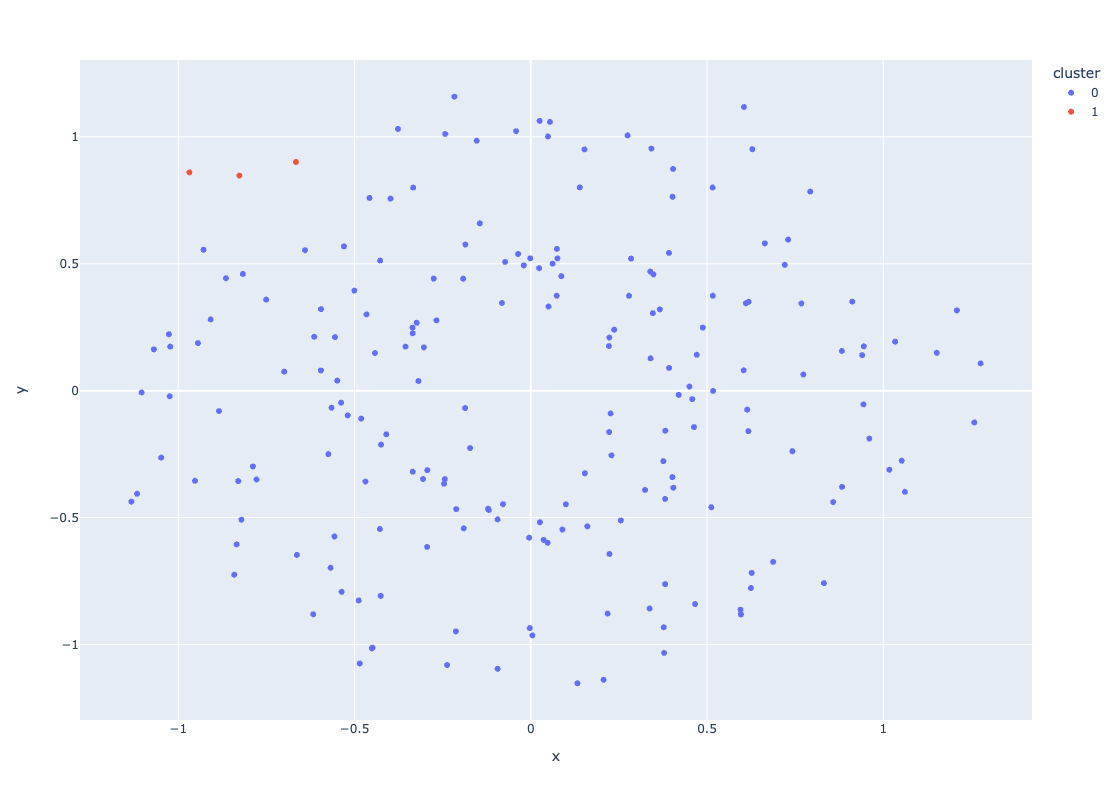

In [224]:
px.scatter(df, x='x', y='y', color='cluster', height = 800)

In [142]:
import random
import math

# Define the centers and radii of the three circles
centers = [(1,1), (3,1), (5,1)]
radis = [0.8, 0.9, 0.7]

# Create an empty list to store the generated points
points = []

# Loop over each circle
for center,radius in zip(centers, radis):
    # Generate a random number of points in the current circle
    num_points = random.randint(100, 150)
    
    # Loop over each point in the current circle
    for i in range(num_points):
        # Generate a random distance from the center of the circle
        r = radius*math.sqrt(random.uniform(0, 1))

        # Generate a random angle in radians
        angle = random.uniform(0, 2*math.pi)

        # Calculate the x and y coordinates of the current point
        x = center[0] + r*math.cos(angle)
        y = center[1] + r*math.sin(angle)

        # Add the current point to the list of points
        points.append((x,y))
    points += [(1.9,1),(2,1),(4,1),(4.2,1)]

In [207]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
df['cluster'] = cluster.fit_predict(df[['x','y']]).astype(str)

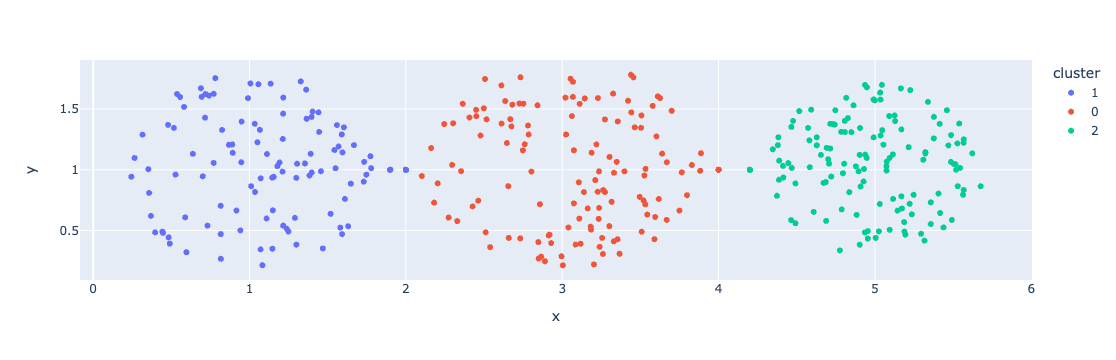

In [208]:
px.scatter(df, x='x', y='y', color='cluster')

In [209]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
df['cluster'] = cluster.fit_predict(df[['x','y']]).astype(str)

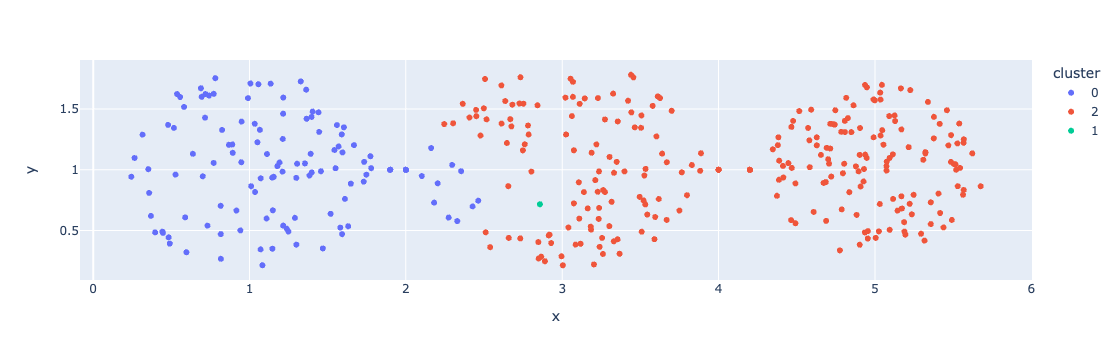

In [210]:
px.scatter(df, x='x', y='y', color='cluster')

## Density-Based Clustering

### DB Scan

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. It belongs to the unsupervised learning family of clustering algorithms.  
When it comes to clustering, usually K-means or Hierarchical clustering algorithms are more popular. But they work well only when the clusters are simple to detect. They will not produce good results when the clusters have complex shapes or structures and this is where the DBSCAN algorithm gets the upper hand.

DBSCAN is a density-based clustering algorithm that assumes that clusters are dense regions in space that are separated by regions having a lower density of data points. Here, the ‘densely grouped’ data points are combined into one cluster. We can identify clusters in large datasets by observing the local density of data points.

A unique feature of DBSCAN clustering is that it is robust to outliers, due to which it finds an application in anomaly detection systems. In addition to that, it does not require the number of clusters to be fed as input, unlike K-Means, where we have to manually specify the number of centroids.

**Key Characteristics of  DBSCAN Algorithm**:
* It does not require the number of clusters as input.
* It is can detect outliers while finding clusters.
* DBSCAN algorithm can detect clusters that are complex or randomly shaped and sized.

### DB Scan Hyper parameters

1. **Epsilon Value (eps)** - 
Epsilon is the radius of the circle around a data point such that all other data points that fall inside the circle are considered as neighborhood points. In other words, two points are considered to be neighbors if the distance between them is less than or equal to eps.
Ideally, we must choose the eps value based on the distances of the points in the dataset. however, normally small eps values are preferred.

2. **Minimum Points minPts** - 
In DBSCAN minPts is the minimum number of data points that should be there in the region to define the cluster. You can choose the value of minPts based on your domain knowledge. But if you lack domain knowledge a good reference point is to have minPts ≥ D + 1 where D is the dimension of the dataset.
It is recommended to keep the value for the minPts at least 3, but for larger data sets, a greater minPts value should be chosen, especially if it has many outliers.


### Types of Points in DBSCAN Clustering

Based on the above two parameters, a point can be classified as:

* **Core point:** A core point is one in which at least have minPts number of points (including the point itself) in its surrounding region within the radius eps.
* **Border point:** A border point is one in which is reachable from a core point and there are less than minPts number of points within its surrounding region.
* **Outlier:**  An outlier is neither a core point and nor is it reachable from any core points.

### DBSCAN Clustering Algorithm

We start with the data points and values of epsilon and minPts as input –

1. We select a random starting point that has not been visited.
2. Determine the neighborhood of this point using epsilon which essentially acts as a radius.
3. If the points in the neighborhood satisfy minPts criteria then the point is marked as a core point. The clustering process will start and the point is marked as visited else this point is labeled as noise.
4. All points within the neighborhood of the core point are also marked as part of the cluster and the above procedure from step 2 is repeated for all epsilon neighborhood points.
5. A new unvisited point is fetched, and following the above steps they are either included to form another cluster or they are marked as noise.
6. The above process is continued till all points are visited.

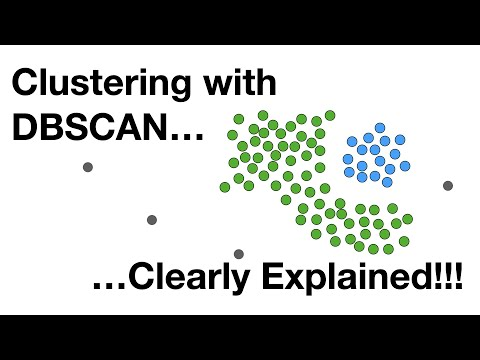

In [155]:
YouTubeVideo('RDZUdRSDOok', width=800, height=300)

In [228]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [229]:
data = blobs_df[['x','y']].copy()

In [240]:
db = DBSCAN(eps=1.5, min_samples=5).fit(data)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set([l for l in labels if l != -1]))
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)

print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 14


In [242]:
data['cluster_id'] = [str(l) for l in labels]

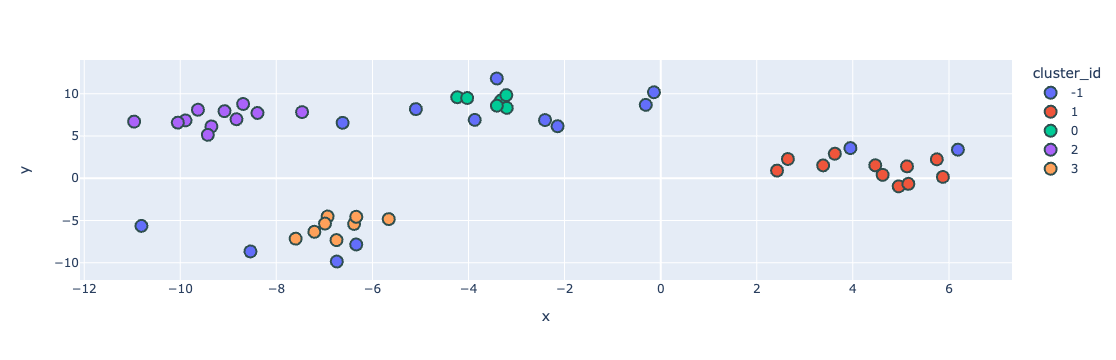

In [243]:
fig = px.scatter(data, x='x', y='y', color='cluster_id')
fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

## Evaluating Clustering Performance

How can we asses the how well a clustering algorithm did? And even before that, how can we asses if the data is even clusterable? Read further here:
1. https://towardsdatascience.com/clustering-evaluation-strategies-98a4006fcfc
2. https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation